# Homework 5: Clustering

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [ ]:
MY_UNIQNAME = 'iviev'

# Part 1: Clustering Music Preferences

In another class, students were asked about their music preferences by rating each of 11 music genres on a 
scale from 1 (=no way) to 10 (=love it).  The de-indentified results are in the data/music.csv file distributed with this
assignment.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
music = pd.read_csv('data/music.csv')

In [3]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,Muriel,8,7,2,6,8,8,7,6,8,9,9
1,Alexis,4,10,4,3,3,1,10,4,6,5,8
2,Alison,5,10,6,2,3,1,5,6,6,3,5
3,Christopher,3,3,4,3,7,10,2,6,9,8,7
4,Merle,3,3,4,5,6,6,6,4,5,5,6


Your goal for this assignment will be to cluster these preferences using a variety of techniques, including one new one.

### Q1 (40 points). Perform K-means clustering on the music preference data
- Identify the best *k* by using methods that we covered from the lab.
- Plot your results and provide your interpretations.
    - What do you like/dislike about the results?
    - What would improve the results?
    - Explain why.


In [8]:
music_data =music.drop(['Name'], axis=1)
music_data.head(5)

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,8,7,2,6,8,8,7,6,8,9,9
1,4,10,4,3,3,1,10,4,6,5,8
2,5,10,6,2,3,1,5,6,6,3,5
3,3,3,4,3,7,10,2,6,9,8,7
4,3,3,4,5,6,6,6,4,5,5,6


In [15]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
data = scale(music_data)

In [23]:
n_samples, n_features = data.shape
print(n_samples, n_features)

47 11


In [25]:
from sklearn import metrics
np.sqrt(n_samples/2)


4.847679857416329

(1, 15.45)

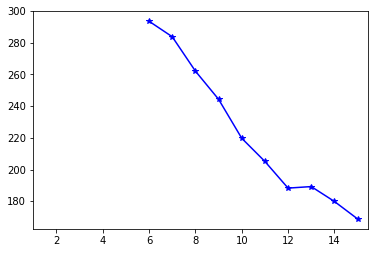

In [113]:
cost = []
for k in range(6,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(6,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

In [13]:
# from sklearn.cluster import KMeans

# n_digits = len(np.unique(digits.target))

# k_means = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
# k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

(1, 15.45)

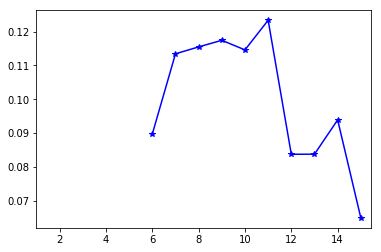

In [114]:
cost = []
for k in range(6,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_))
    
fig, ax = plt.subplots()
plt.plot(range(6,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

The rule of thumb method suggested 4.85 clusters, the elbow method suggests that there are between 10 and 11 clusters. The silhouette suggests that there are 11 clusters. 

The silhouette gives the best k because it has a clear maximum number of k. Increasing the number of observations will likely improve the result. 

### Q2 (40 points). Perform hierarchical clustering on the music preference data
- Identify your choice of the best cut point
    - provide justification for your choice
- Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)
- Plot your results and provide interpretations
    - What do you like/dislike about the results?
    - What would improve the results?
    - Who is most similar to whom?  Are there obvious groups?
    - Compare with the k-means result. Which one is better? Explain why.

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(data)
# print(dist)

[[ 0.00000000e+00  7.56624739e-01  9.37156766e-01 ...  7.83890174e-01
   9.45733981e-01  8.00494256e-01]
 [ 7.56624739e-01  2.22044605e-16  2.14638871e-01 ...  9.33250660e-01
   7.20978019e-01  8.86171173e-01]
 [ 9.37156766e-01  2.14638871e-01 -2.22044605e-16 ...  1.09970094e+00
   7.66517870e-01  9.34528501e-01]
 ...
 [ 7.83890174e-01  9.33250660e-01  1.09970094e+00 ...  1.11022302e-16
   9.39607355e-01  1.32810367e+00]
 [ 9.45733981e-01  7.20978019e-01  7.66517870e-01 ...  9.39607355e-01
   1.11022302e-16  1.02504006e+00]
 [ 8.00494256e-01  8.86171173e-01  9.34528501e-01 ...  1.32810367e+00
   1.02504006e+00  0.00000000e+00]]


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


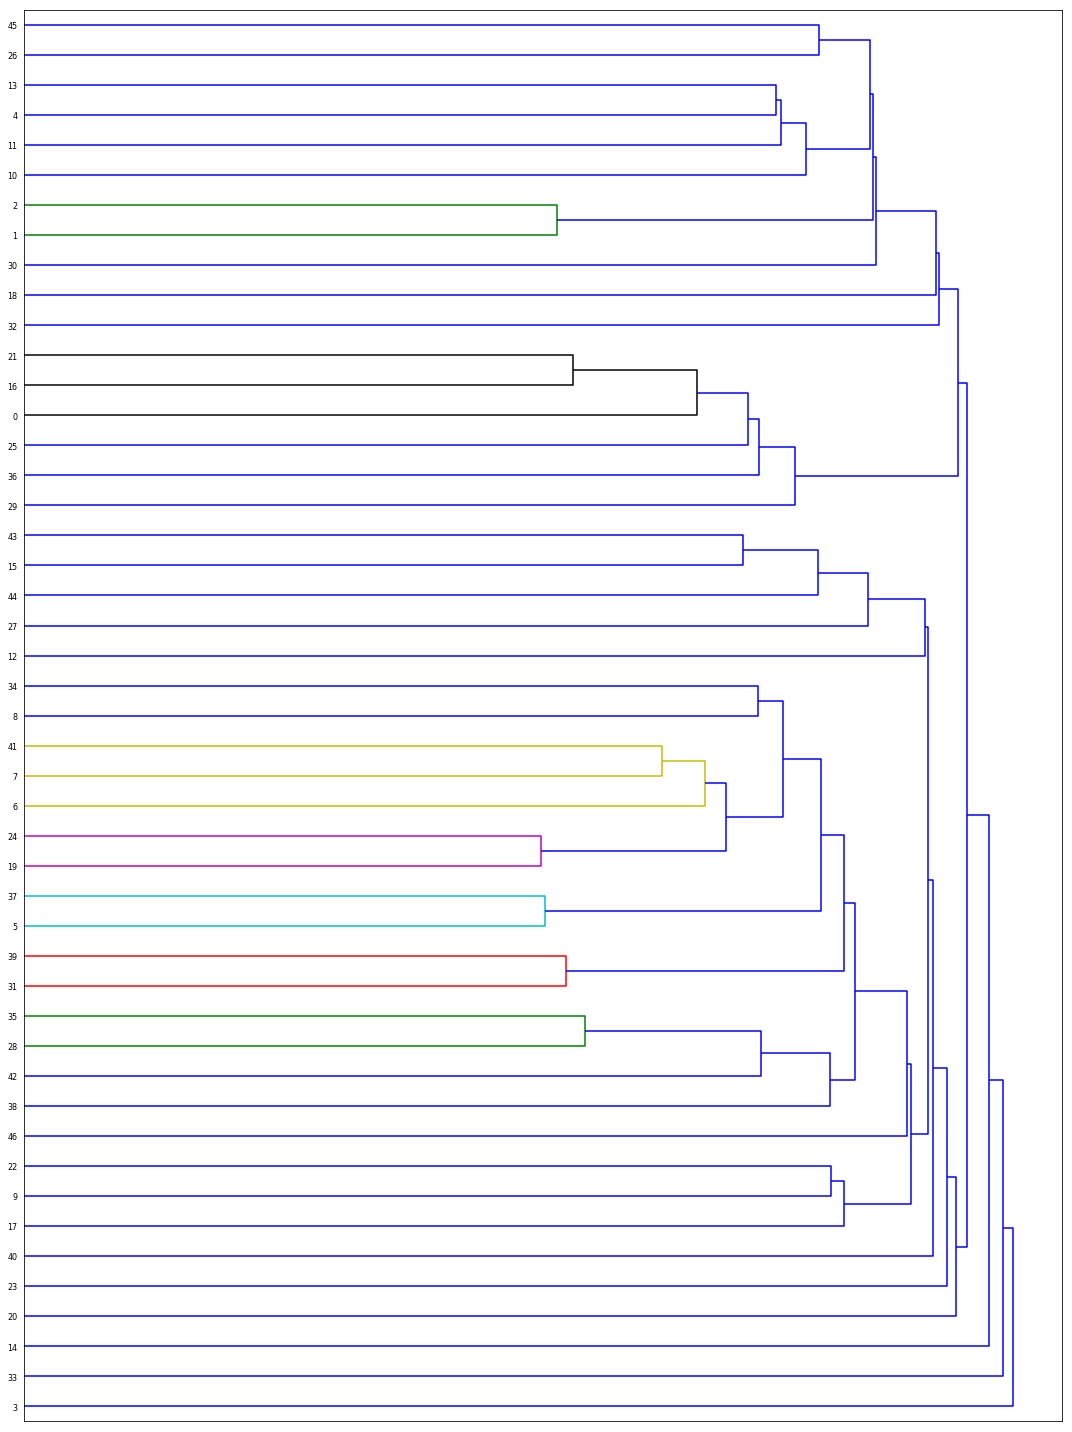

In [48]:
from scipy.cluster.hierarchy import single, dendrogram

linkage_matrix = single(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


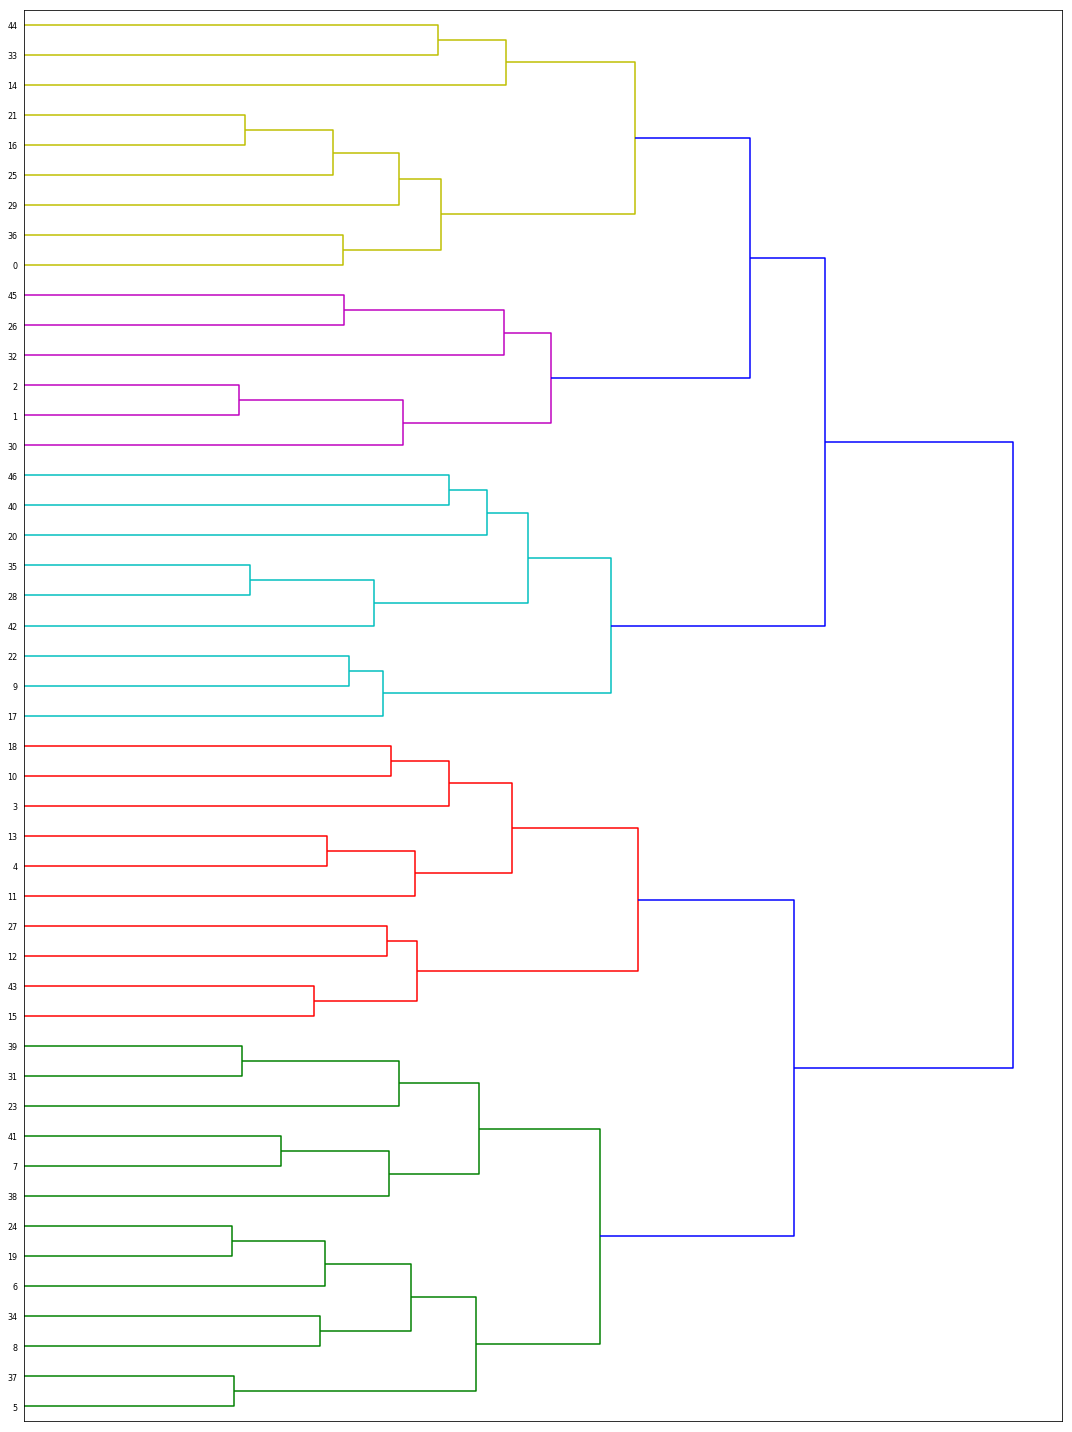

In [49]:
from scipy.cluster.hierarchy import complete, dendrogram

linkage_matrix = complete(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


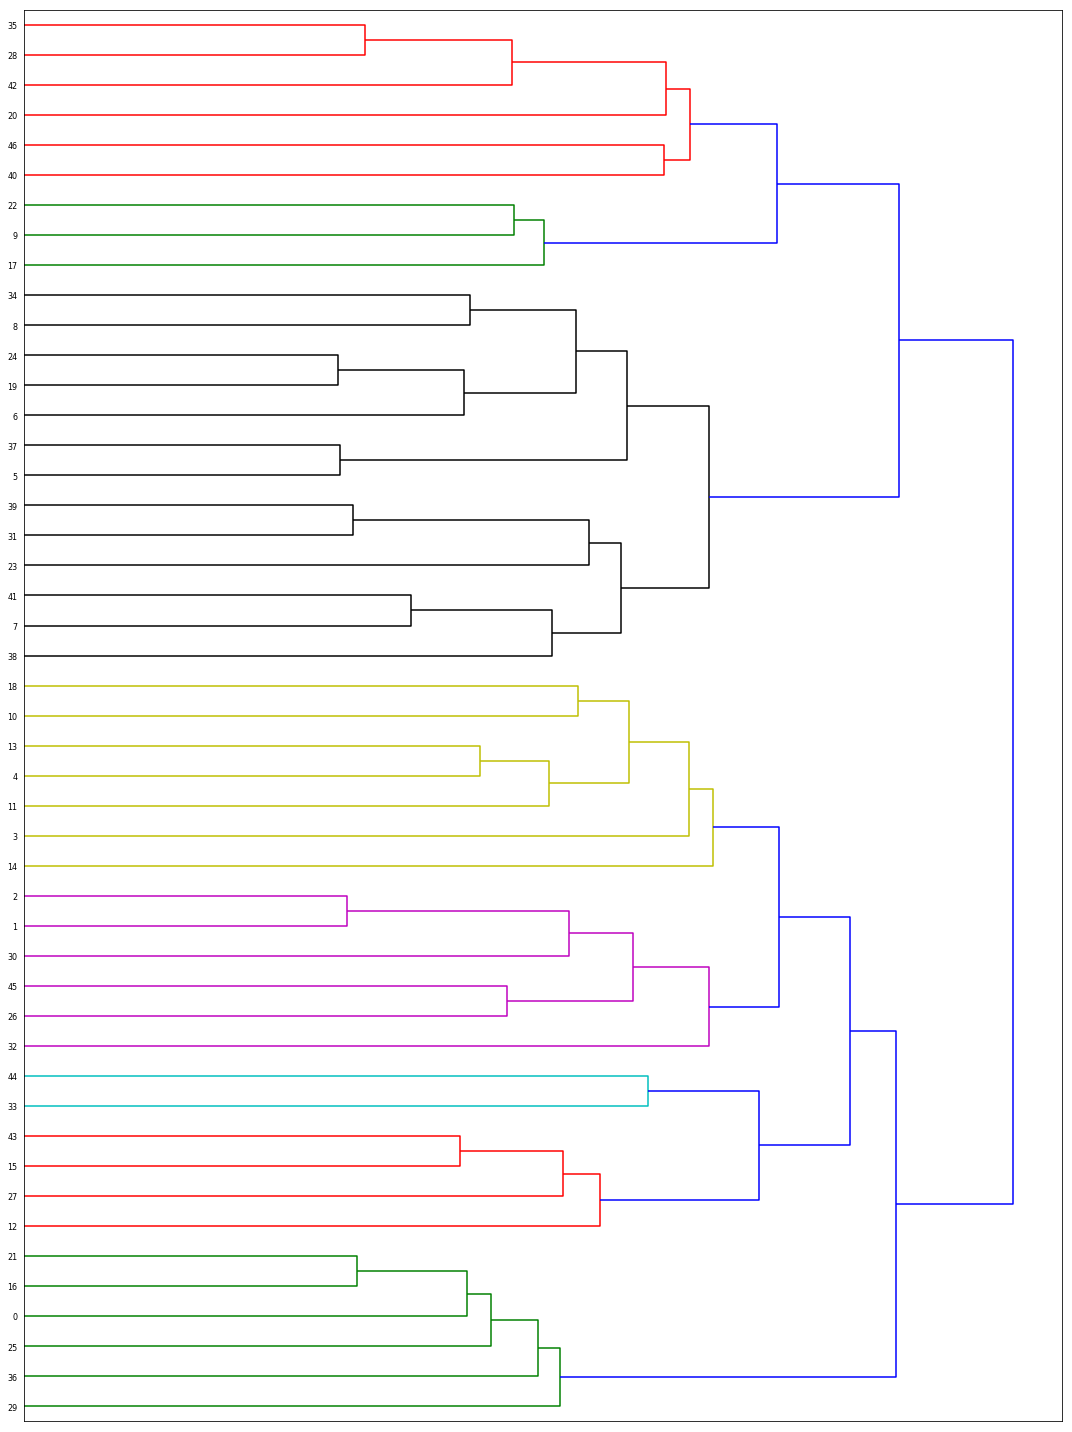

In [50]:
from scipy.cluster.hierarchy import average, dendrogram

linkage_matrix = average(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


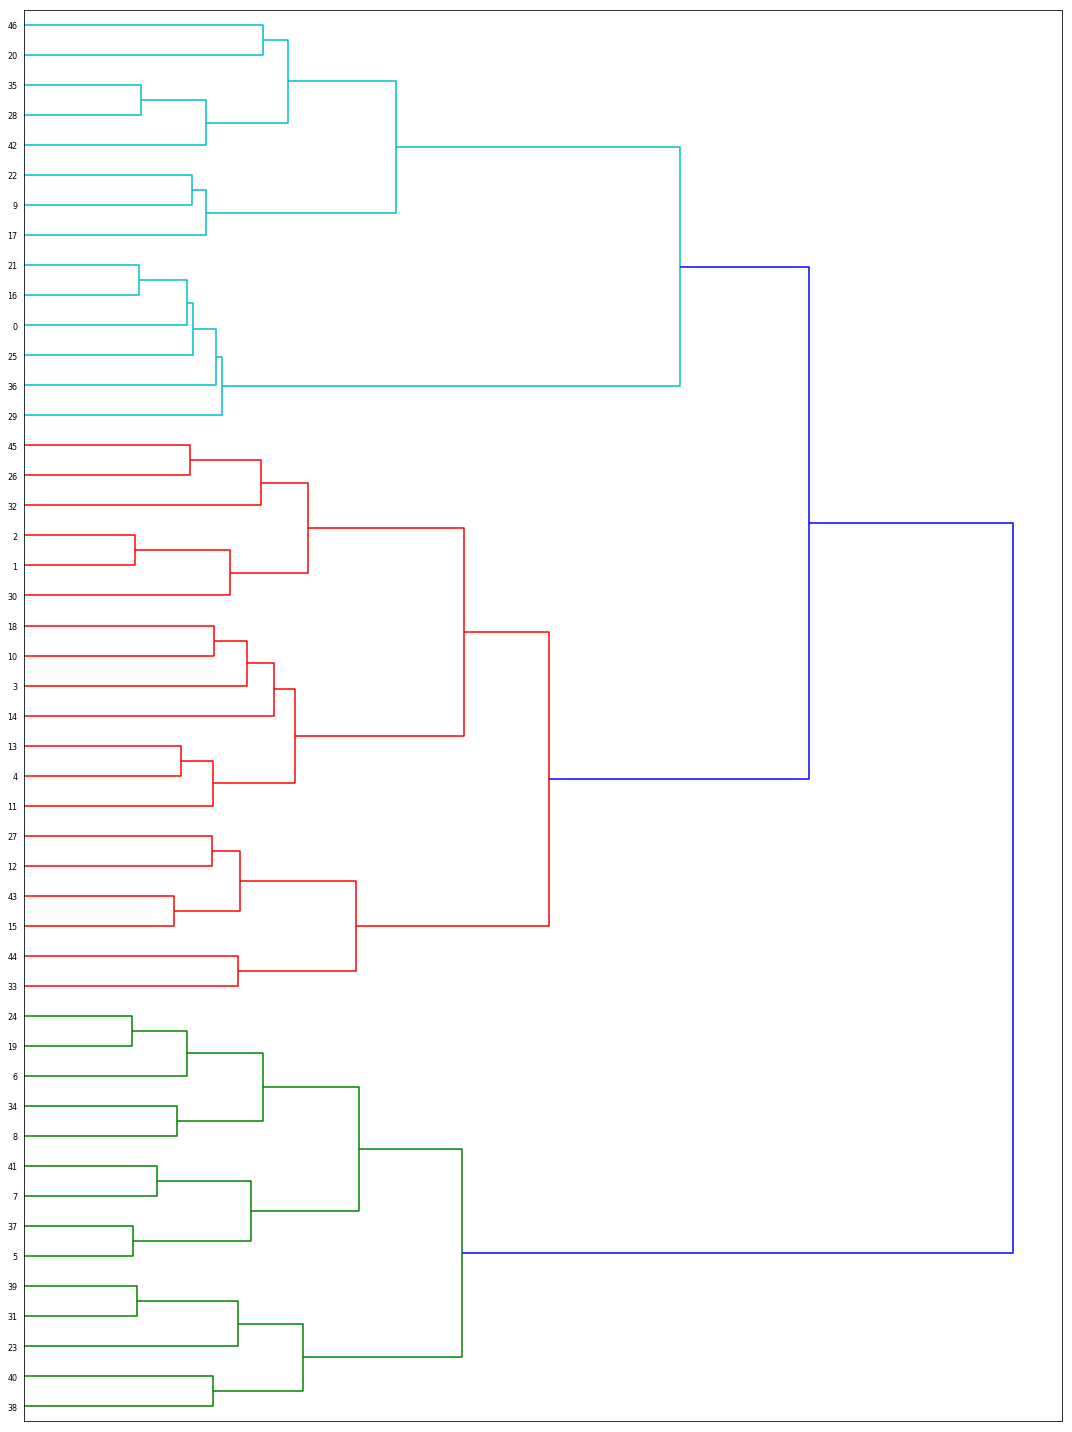

In [108]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

In [109]:
from scipy.cluster.hierarchy import fcluster
cluster_item = fcluster(linkage_matrix, 5, criterion= "maxclust")
cluster_item

array([4, 3, 3, 3, 3, 1, 1, 1, 1, 5, 3, 3, 2, 3, 3, 2, 4, 5, 3, 1, 5, 4,
       5, 1, 1, 4, 3, 2, 5, 4, 3, 1, 3, 2, 1, 5, 4, 1, 1, 1, 1, 1, 5, 2,
       2, 3, 5], dtype=int32)

In [110]:
music['cluster'] = cluster_item

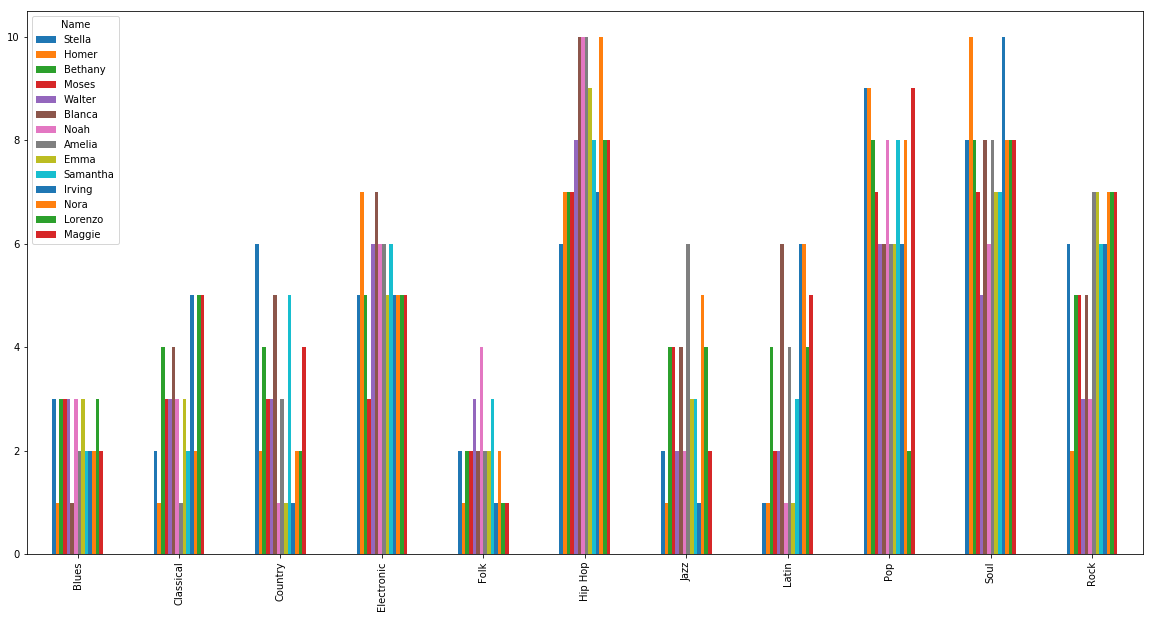

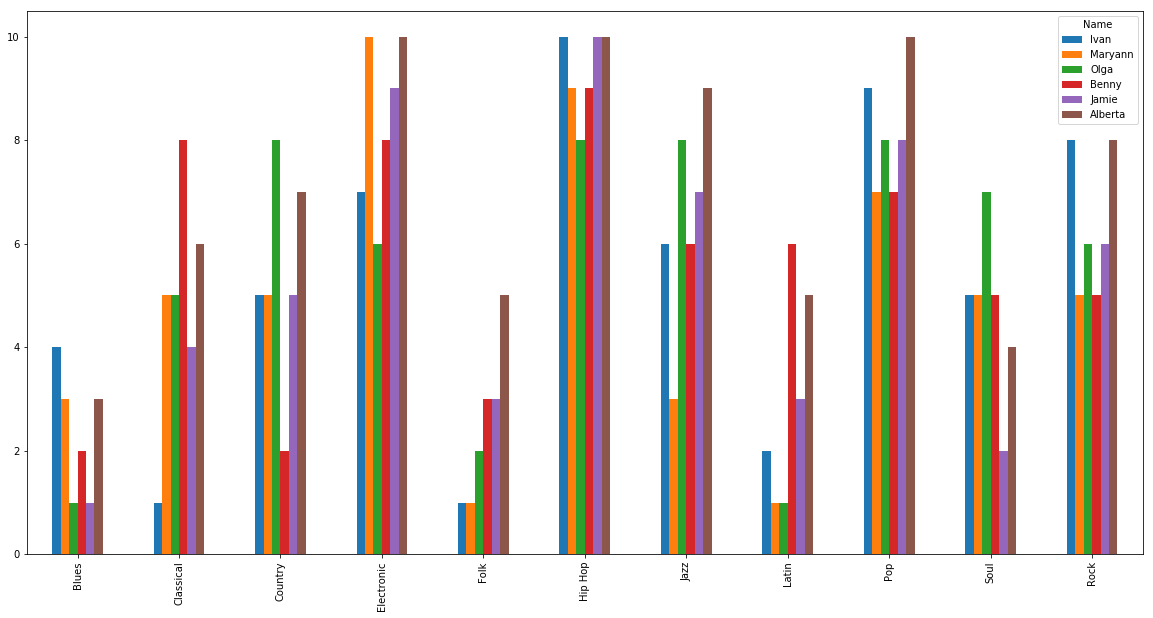

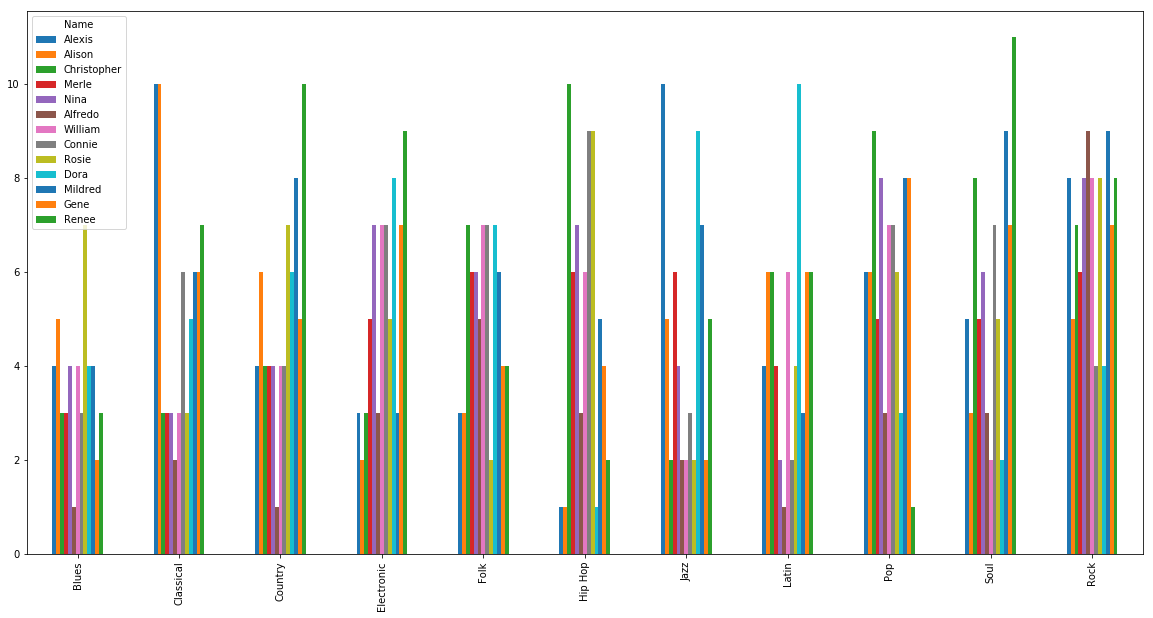

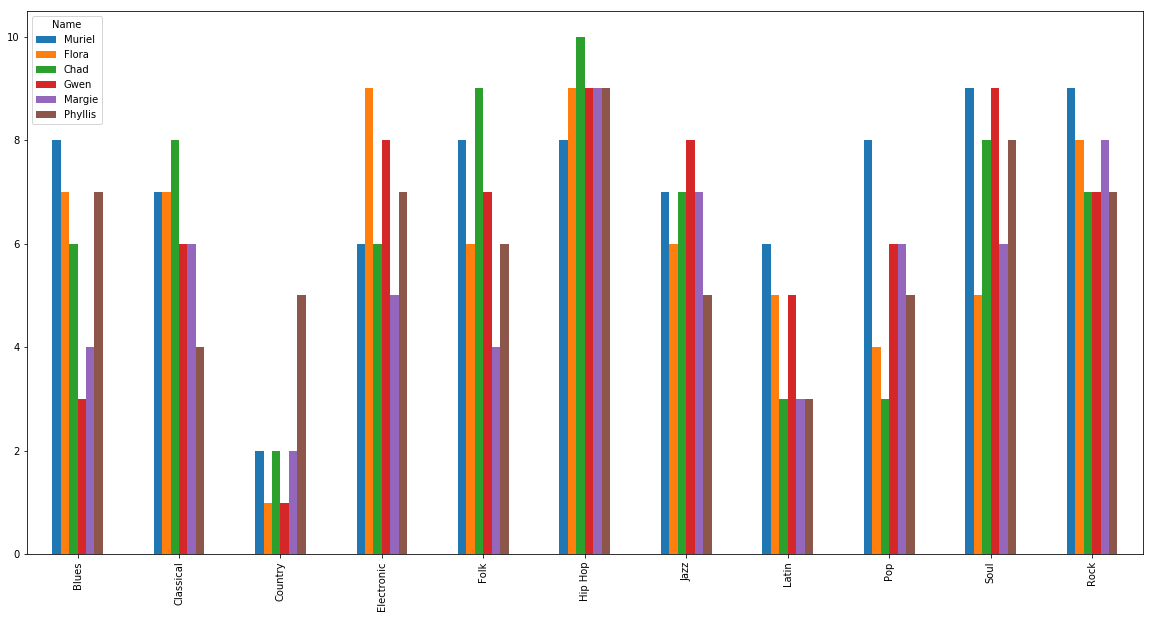

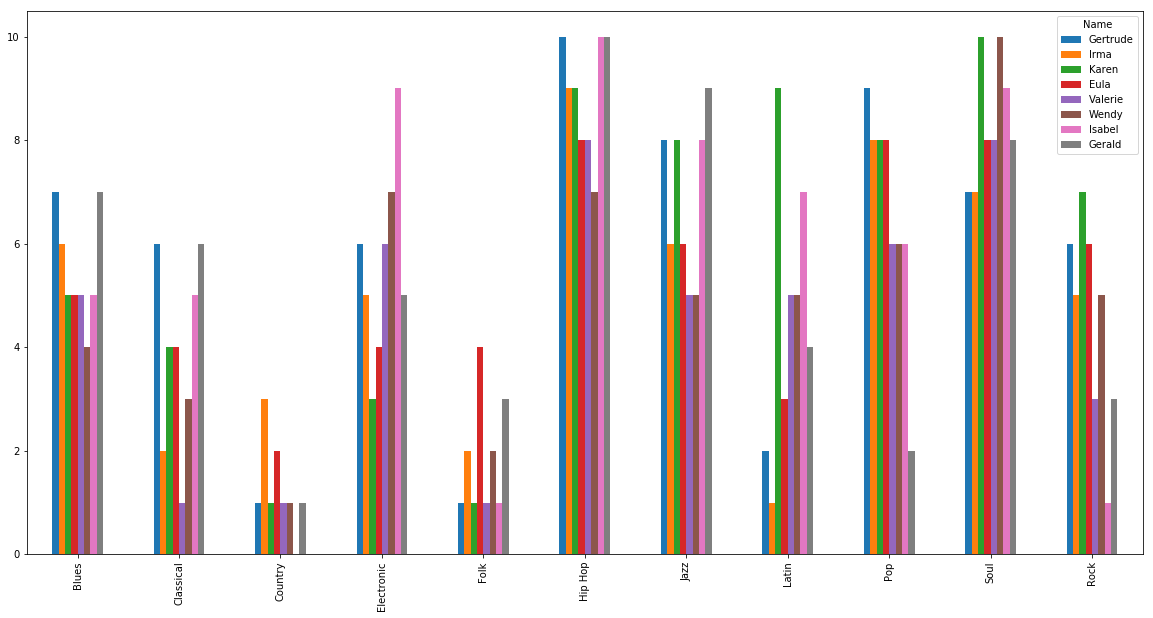

In [111]:
for i in range(1,6): 
    df_cluster = music[(music['cluster']== i)]
    df_cluster = df_cluster.drop(columns='cluster')
    cluster_transposed = df_cluster.T
    new_header = cluster_transposed.iloc[0] #grab the first row for the header
    cluster_transposed = cluster_transposed[1:] #take the data less the header row
    cluster_transposed.columns = new_header
    cluster_transposed
    cluster_transposed.plot.bar(figsize=(20,10))

To dtermine the cluseters, I identified the longest line and chose clusters from them. For the single cluster it is difficult to see any distinct cluster as they are all grouped together. There were six clusters shown using the max/complete linkage function. For the average linkage function I can indentify nine different clusters. Ward showed the longest distance asindicated byt its long horizontal lines and therefore is the best way to perform hierarchical clustering for this data. 
I didn't like that the graphs were subjective, it was difficult to determine the how many clusters were present. 
Complete and average seem to be similar.
Comparing this with K means results, there seems to be less clusters shown by the k means. The linkage function seems like a better way to perform hierarchical clustering because it shows more distinct cluster. 



# Bonus (10 points): Vector Quantization

To complete this bonus section you'll need to install the ```imageio``` package.

We can also use K-Means clustering for image compression by reducing the number of colors in an image to *k*. We'll try this for the next question.

![](resources/mandrill-large.png)

`mandrill-large.png` is a 512×512 pixel image represented in 24-bit color. What this means is that for each of the 262144 pixels in the image, there are three numbers ranging from 0 to 255. Let's load it up.

In [8]:
mandrill = np.float64(imageio.imread("resources/mandrill-large.png"))
mandrill

Image([[[164., 150.,  71.],
        [ 63.,  57.,  31.],
        [ 75.,  43.,  10.],
        ...,
        [117., 119.,  68.],
        [141., 170., 101.],
        [179., 188., 118.]],

       [[120., 125.,  62.],
        [135.,  97.,  33.],
        [ 55.,  35.,  23.],
        ...,
        [122., 140.,  98.],
        [136., 159., 128.],
        [120., 138.,  74.]],

       [[ 99.,  74.,  31.],
        [132., 118.,  46.],
        [ 60.,  41.,  36.],
        ...,
        [118.,  93.,  90.],
        [ 87.,  91.,  77.],
        [ 96.,  80.,  49.]],

       ...,

       [[121., 148., 155.],
        [123., 156., 150.],
        [124., 150., 139.],
        ...,
        [110.,  73.,  60.],
        [ 90.,  93.,  70.],
        [ 81.,  80.,  60.]],

       [[126., 169., 168.],
        [117., 151., 151.],
        [121., 136., 133.],
        ...,
        [ 73.,  84.,  68.],
        [ 99.,  69.,  86.],
        [ 80.,  63.,  71.]],

       [[  9.,  11.,  12.],
        [ 10.,  12.,  11.],
        [ 11.,  

In [9]:
mandrill.shape

(512, 512, 3)

To make it easier to work with (especially for `plt.imshow()`), we'll convert each pixel to a float from the default 8-bit per pixel integer coding. We divide by 255 to normalize it to the range [0-1].

In [10]:
mandrill = np.array(mandrill, dtype=np.float64) / 255
mandrill

array([[[0.64313725, 0.58823529, 0.27843137],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411765, 0.16862745, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666667],
        [0.55294118, 0.66666667, 0.39607843],
        [0.70196078, 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313725],
        [0.52941176, 0.38039216, 0.12941176],
        [0.21568627, 0.1372549 , 0.09019608],
        ...,
        [0.47843137, 0.54901961, 0.38431373],
        [0.53333333, 0.62352941, 0.50196078],
        [0.47058824, 0.54117647, 0.29019608]],

       [[0.38823529, 0.29019608, 0.12156863],
        [0.51764706, 0.4627451 , 0.18039216],
        [0.23529412, 0.16078431, 0.14117647],
        ...,
        [0.4627451 , 0.36470588, 0.35294118],
        [0.34117647, 0.35686275, 0.30196078],
        [0.37647059, 0.31372549, 0.19215686]],

       ...,

       [[0.4745098 , 0.58039216, 0.60784314],
        [0.48235294, 0.61176471, 0.58823529],
        [0.48627451, 0

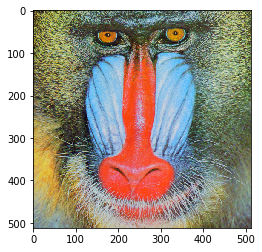

In [11]:
plt.imshow(mandrill)
plt.show()

Let's reshape it into a 2D array. This gives us a long array of [RGB pixel values](https://en.wikipedia.org/wiki/RGB_color_model).

In [12]:
w, h, d = original_shape = tuple(mandrill.shape)
image_array = np.reshape(mandrill, (w * h, d))
image_array

array([[0.64313725, 0.58823529, 0.27843137],
       [0.24705882, 0.22352941, 0.12156863],
       [0.29411765, 0.16862745, 0.03921569],
       ...,
       [0.01960784, 0.03137255, 0.01960784],
       [0.00784314, 0.01960784, 0.        ],
       [0.01568627, 0.01960784, 0.00784314]])


* After running `KMeans`, you should have 16 centroids, where each centroid is a vector of 3 dimensions corresponding to the 16 quantized RGB values you need. Ensure that this is the case by looking at the `kmeans.cluster_centers_`, assuming `kmeans` is the result of your clustering.
* Replace the values in `image_array` with the centroid values. To know which cluster each pixel of `image_array` falls in, you can run `.predict(image_array)` on the result of your `KMeans` clustering. Then from the cluster, you can get the centroid value from `.cluster_centters_` mentioned above.
* Recreate the image data to be displayed. Show it with `plt.imshow()`. How does it look? By how much have we compressed the results?
* Try a few different values of *k* and compare the results.

In [13]:
# Your code here…